In [12]:
import sys
import os
import pandas as pd
import numpy as np

sys.path.append(os.path.abspath('../../'))

In [13]:
from mcda.core.functions import Threshold
from mcda.core.scales import PreferenceDirection, QuantitativeScale

In [14]:
from mcda.electre.concordance import (
    concordance,
    Interaction,
    InteractionType,
    FunctionType,
    concordance_with_interactions,
)
from mcda.electre.discordance import (
    discordance_marginals,
    discordance,
    non_discordance,
    NonDiscordanceType,
)
from mcda.electre.credibility import (
    credibility_comprehensive
)
from mcda.electre.outranking import (
    crisp_cut,
    outranking_relation,
    OutrankingRelation,
)
from mcda.electre.outranking.choice import find_kernel
from mcda.electre.plot import plot_outranking

In [15]:
criteria_names = [
    "costs",
    "quality",
    "RL capacity",
    "technology",
    "relationship",
    "financial perf.",
    "management of risk",
    "RL practices",
    "organization role",
    "green level",
    "low-carbon",
    "environmental management",
    "micro-social",
    "macro-social",
]
alternatives_names = ["S1", "S2", "S3", "S4", "S5"]

In [16]:
perf_table = pd.DataFrame([
    [3, 8, 7, 6, 6, 7, 8, 7, 6, 6, 4, 8, 6, 8],
    [5, 8, 6, 7, 7, 6, 6, 8, 7, 6, 4, 8, 9, 8],
    [2, 8, 8, 8, 9, 8, 7, 6, 5, 5, 4, 7, 7, 3],
    [4, 7, 8, 7, 6, 7, 8, 6, 7, 6, 3, 8, 6, 6],
    [4, 8, 8, 8, 8, 7, 8, 9, 8, 8, 2, 9, 8, 6],
], index=alternatives_names, columns=criteria_names)
perf_table

,costs,quality,RL capacity,technology,relationship,financial perf.,management of risk,RL practices,organization role,green level,low-carbon,environmental management,micro-social,macro-social
S1,3,8,7,6,6,7,8,7,6,6,4,8,6,8
S2,5,8,6,7,7,6,6,8,7,6,4,8,9,8
S3,2,8,8,8,9,8,7,6,5,5,4,7,7,3
S4,4,7,8,7,6,7,8,6,7,6,3,8,6,6
S5,4,8,8,8,8,7,8,9,8,8,2,9,8,6


In [17]:
scales = pd.Series([
    QuantitativeScale(0, 10, PreferenceDirection.MIN),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10, PreferenceDirection.MIN),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
    QuantitativeScale(0, 10),
], index=criteria_names)
scales

costs                       Scale [0, 10], min direction
quality                     Scale [0, 10], max direction
RL capacity                 Scale [0, 10], max direction
technology                  Scale [0, 10], max direction
relationship                Scale [0, 10], max direction
financial perf.             Scale [0, 10], max direction
management of risk          Scale [0, 10], max direction
RL practices                Scale [0, 10], max direction
organization role           Scale [0, 10], max direction
green level                 Scale [0, 10], max direction
low-carbon                  Scale [0, 10], min direction
environmental management    Scale [0, 10], max direction
micro-social                Scale [0, 10], max direction
macro-social                Scale [0, 10], max direction
dtype: object

In [18]:
weights = pd.Series([
    0.019, 0.123, 0.067, 0.019, 0.048, 0.029, 0.133, 0.067, 0.086, 0.095, 0.095, 0.105, 0.057, 0.057
], index=criteria_names)
weights

costs                       0.019
quality                     0.123
RL capacity                 0.067
technology                  0.019
relationship                0.048
financial perf.             0.029
management of risk          0.133
RL practices                0.067
organization role           0.086
green level                 0.095
low-carbon                  0.095
environmental management    0.105
micro-social                0.057
macro-social                0.057
dtype: float64

In [19]:
indifference = pd.Series([
    Threshold(0, 0),
    Threshold(0, 0),
    Threshold(0, 0.5),
    Threshold(0, 1),
    Threshold(0, 0.5),
    Threshold(0, 0),
    Threshold(0, 0.5),
    Threshold(0, 1),
    Threshold(0, 0.5),
    Threshold(0, 1),
    Threshold(0, 0.5),
    Threshold(0, 1),
    Threshold(0, 0),
    Threshold(0, 0),
], index=criteria_names)
indifference

costs                         Threshold: alpha=0, beta=0
quality                       Threshold: alpha=0, beta=0
RL capacity                 Threshold: alpha=0, beta=0.5
technology                    Threshold: alpha=0, beta=1
relationship                Threshold: alpha=0, beta=0.5
financial perf.               Threshold: alpha=0, beta=0
management of risk          Threshold: alpha=0, beta=0.5
RL practices                  Threshold: alpha=0, beta=1
organization role           Threshold: alpha=0, beta=0.5
green level                   Threshold: alpha=0, beta=1
low-carbon                  Threshold: alpha=0, beta=0.5
environmental management      Threshold: alpha=0, beta=1
micro-social                  Threshold: alpha=0, beta=0
macro-social                  Threshold: alpha=0, beta=0
dtype: object

In [20]:
preference = pd.Series([
    Threshold(0, 1),
    Threshold(0, 1),
    Threshold(0, 1.5),
    Threshold(0, 2),
    Threshold(0, 2.5),
    Threshold(0, 1),
    Threshold(0, 1.5),
    Threshold(0, 2),
    Threshold(0, 2),
    Threshold(0, 2),
    Threshold(0, 1.5),
    Threshold(0, 1),
    Threshold(0, 1),
    Threshold(0, 1),
], index=criteria_names)
preference

costs                         Threshold: alpha=0, beta=1
quality                       Threshold: alpha=0, beta=1
RL capacity                 Threshold: alpha=0, beta=1.5
technology                    Threshold: alpha=0, beta=2
relationship                Threshold: alpha=0, beta=2.5
financial perf.               Threshold: alpha=0, beta=1
management of risk          Threshold: alpha=0, beta=1.5
RL practices                  Threshold: alpha=0, beta=2
organization role             Threshold: alpha=0, beta=2
green level                   Threshold: alpha=0, beta=2
low-carbon                  Threshold: alpha=0, beta=1.5
environmental management      Threshold: alpha=0, beta=1
micro-social                  Threshold: alpha=0, beta=1
macro-social                  Threshold: alpha=0, beta=1
dtype: object

In [21]:
veto = pd.Series([
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    Threshold(0, 4),
    Threshold(0, 6),
    Threshold(0, 3.5),
    Threshold(0, 5),
    None,
    Threshold(0, 6),
], index=criteria_names)
veto

costs                                               None
quality                                             None
RL capacity                                         None
technology                                          None
relationship                                        None
financial perf.                                     None
management of risk                                  None
RL practices                                        None
organization role             Threshold: alpha=0, beta=4
green level                   Threshold: alpha=0, beta=6
low-carbon                  Threshold: alpha=0, beta=3.5
environmental management      Threshold: alpha=0, beta=5
micro-social                                        None
macro-social                  Threshold: alpha=0, beta=6
dtype: object

In [22]:
pre_veto = pd.Series([
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    Threshold(0, 3),
    Threshold(0, 4),
    Threshold(0, 2.5),
    Threshold(0, 4),
    None,
    Threshold(0, 4),
], index=criteria_names)
pre_veto

costs                                               None
quality                                             None
RL capacity                                         None
technology                                          None
relationship                                        None
financial perf.                                     None
management of risk                                  None
RL practices                                        None
organization role             Threshold: alpha=0, beta=3
green level                   Threshold: alpha=0, beta=4
low-carbon                  Threshold: alpha=0, beta=2.5
environmental management      Threshold: alpha=0, beta=4
micro-social                                        None
macro-social                  Threshold: alpha=0, beta=4
dtype: object

In [23]:
interactions = pd.DataFrame([[None] * len(criteria_names)], index=criteria_names, columns=criteria_names)
interactions["costs"]["quality"] = Interaction(InteractionType.A, 0.01)
interactions["environmental management"]["technology"] = Interaction(InteractionType.MS, 0.01)
interactions["RL practices"]["RL capacity"] = Interaction(InteractionType.MW, -0.02)
interactions["management of risk"]["quality"] = Interaction(InteractionType.MS, 0.03)
interactions["low-carbon"]["green level"] = Interaction(InteractionType.MW, -0.04)
interactions["macro-social"]["micro-social"] = Interaction(InteractionType.MW, -0.02)
interactions

,costs,quality,RL capacity,technology,relationship,financial perf.,management of risk,RL practices,organization role,green level,low-carbon,environmental management,micro-social,macro-social
costs,None,None,None,None,None,None,None,None,None,None,None,None,None,None
quality,Antagonistic | 0.01,None,None,None,None,None,Mutual Strengthening | 0.03,None,None,None,None,None,None,None
RL capacity,None,None,None,None,None,None,None,Mutual Weakening | -0.02,None,None,None,None,None,None
technology,None,None,None,None,None,None,None,None,None,None,None,Mutual Strengthening | 0.01,None,None
relationship,None,None,None,None,None,None,None,None,None,None,None,None,None,None
financial perf.,None,None,None,None,None,None,None,None,None,None,None,None,None,None
management of risk,None,None,None,None,None,None,None,None,None,None,None,None,None,None
RL practices,None,None,None,None,None,None,None,None,None,None,None,None,None,None
organization role,None,None,None,None,None,None,None,None,None,None,None,None,None,None
green level,None,None,None,None,None,None,None,None,None,None,Mutual Weakening | -0.04,None,None,None


In [24]:
concordance_table = concordance_with_interactions(
    perf_table,
    scales,
    weights,
    indifference,
    preference,
    interactions,
    function_type=FunctionType.MIN,
)
concordance_table

,S1,S2,S3,S4,S5
S1,1.000000,0.900340,0.788144,0.889226,0.525728
S2,0.769355,1.000000,0.772251,0.692187,0.511565
S3,0.842314,0.733000,1.000000,0.739086,0.380788
S4,0.790526,0.674227,0.709474,1.000000,0.550330
S5,0.921649,0.883673,0.936842,1.000000,1.000000


In [25]:
concordance(
    perf_table,
    scales,
    weights,
    indifference,
    preference
)

,S1,S2,S3,S4,S5
S1,1.000000,0.902333,0.7945,0.890333,0.511500
S2,0.785500,1.000000,0.7825,0.704500,0.521333
S3,0.847833,0.733000,1.0000,0.743000,0.371500
S4,0.801000,0.684000,0.7240,1.000000,0.545833
S5,0.924000,0.886000,0.9400,1.000000,1.000000


In [26]:
discordance_marginals_table = discordance_marginals(
    perf_table,
    scales,
    preference,
    veto,
    pre_veto
)
discordance_marginals_table

,S1,S2,S3,S4,S5
S1,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...
S2,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...
S3,costs 0.0 quality ...,costs 0.0 quality ...,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...
S4,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...
S5,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...,costs 0 quality ...


In [27]:
discordance_marginals_table["S2"]["S3"]

costs                       0.0
quality                     0.0
RL capacity                 0.0
technology                  0.0
relationship                0.0
financial perf.             0.0
management of risk          0.0
RL practices                0.0
organization role           0.0
green level                 0.0
low-carbon                  0.0
environmental management    0.0
micro-social                0.0
macro-social                0.5
dtype: float64

In [28]:
discordance_table = discordance(discordance_marginals_table, weights)
discordance_table

,S1,S2,S3,S4,S5
S1,0.0000,0.0000,0.0,0.0,0.0
S2,0.0000,0.0000,0.0,0.0,0.0
S3,0.0285,0.0285,0.0,0.0,0.0
S4,0.0000,0.0000,0.0,0.0,0.0
S5,0.0000,0.0000,0.0,0.0,0.0


In [29]:
non_discordance_table = non_discordance(
    discordance_marginals_table,
    NonDiscordanceType.D
)
non_discordance_table

,S1,S2,S3,S4,S5
S1,1.0,1.0,1,1,1
S2,1.0,1.0,1,1,1
S3,0.5,0.5,1,1,1
S4,1.0,1.0,1,1,1
S5,1.0,1.0,1,1,1


In [30]:
credibility_table = credibility_comprehensive(
    concordance_table,
    non_discordance_table
)
credibility_table

,S1,S2,S3,S4,S5
S1,1.000000,0.900340,0.788144,0.889226,0.525728
S2,0.769355,1.000000,0.772251,0.692187,0.511565
S3,0.421157,0.366500,1.000000,0.739086,0.380788
S4,0.790526,0.674227,0.709474,1.000000,0.550330
S5,0.921649,0.883673,0.936842,1.000000,1.000000


In [31]:
crisp_relation_table = crisp_cut(
    credibility_table,
    cutting_level=0.8
)
crisp_relation_table

,S1,S2,S3,S4,S5
S1,True,True,False,True,False
S2,False,True,False,False,False
S3,False,False,True,False,False
S4,False,False,False,True,False
S5,True,True,True,True,True


In [32]:
find_kernel(crisp_relation_table)

['S5']

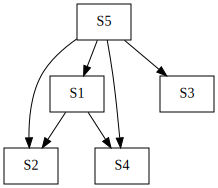

In [33]:
plot_outranking(crisp_relation_table, transitive_reduction=False)